In [60]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Iris Dataset
iris = datasets.load_iris()

# X = Features aka inputs , Y = Classification aka output
X = iris.data
Y = iris.target

x1 = pd.DataFrame(data = X , columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y1 = pd.DataFrame(data = Y, columns= ['Classification'])

Iris = pd.concat([x1, y1], axis = 1, join = 'inner')
print(Iris)

     Sepal length  Sepal width  Petal length  Petal width  Classification
0             5.1          3.5           1.4          0.2               0
1             4.9          3.0           1.4          0.2               0
2             4.7          3.2           1.3          0.2               0
3             4.6          3.1           1.5          0.2               0
4             5.0          3.6           1.4          0.2               0
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3               2
146           6.3          2.5           5.0          1.9               2
147           6.5          3.0           5.2          2.0               2
148           6.2          3.4           5.4          2.3               2
149           5.9          3.0           5.1          1.8               2

[150 rows x 5 columns]


In [62]:
# Iris classifications

IC = np.unique(Y)
IrisC = ('Setosa', 'Versicolor', 'Virginica')
pltColor = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue', 'lightgreen')
pltShapes = ('o', 'x', '*')
for i in range(3):
    print (IC[i], pltShapes[i], IrisC[i], pltColor[i], pltCback[i])

# 0 o Setosa red pink
# 1 x Versicolor blue lightblue
# 2 * Virginica green lightgreen

# Feature labels
IrisFeatures =("sepal length [cm]", "sepal width [cm]", "petal length [cm]", "petal width [cm]")
for i in range(4):
    print(IrisFeatures[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen
sepal length [cm]
sepal width [cm]
petal length [cm]
petal width [cm]


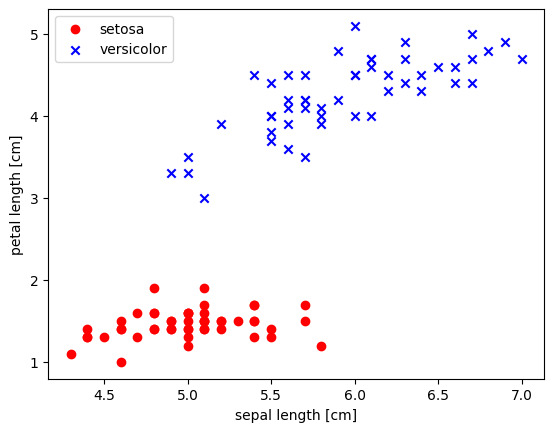

In [63]:
# Plots

plt.close('all')

# Plotting sepal length & petal length
y =  Iris.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)
x = Iris.iloc[0:100, [0, 2]].values

plt.scatter(x[:50, 0], x[:50, 1],
            color = pltColor[0], marker = pltShapes[0], label = 'setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
            color = pltColor[1], marker = pltShapes[1], label = 'versicolor')

plt.xlabel(IrisFeatures[0])
plt.ylabel(IrisFeatures[2])
plt.legend(loc = 'upper left')

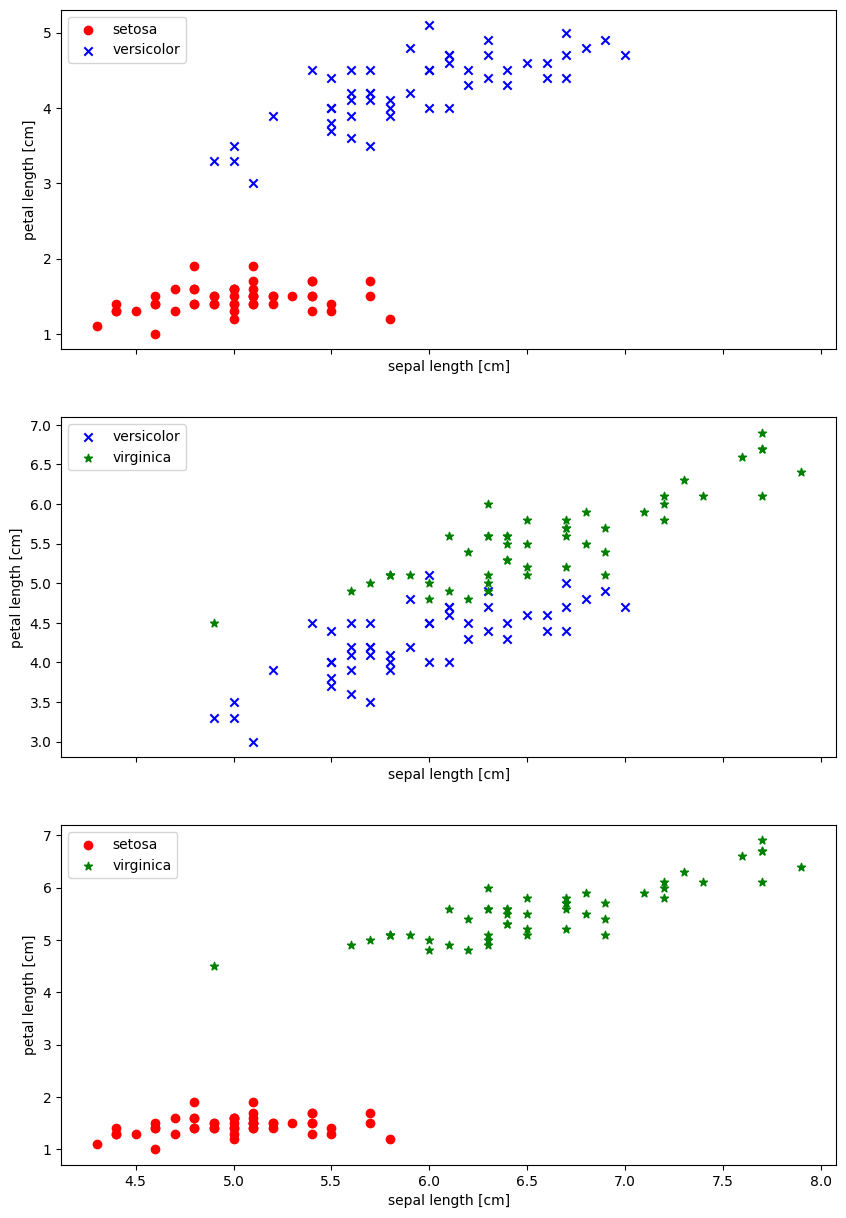

In [64]:
plt.close('all')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,15), sharex=True)

# Setosa & Versicolor

y =  Iris.iloc[0:100, 4].values
#y = np.where(y == 0, -1, 1)
x = Iris.iloc[0:100, [0, 2]].values

ax[0].scatter(x[:50, 0], x[:50, 1],
            color = pltColor[0], marker = pltShapes[0], label = 'setosa')
ax[0].scatter(x[50:100, 0], x[50:100, 1],
            color = pltColor[1], marker = pltShapes[1], label = 'versicolor')

ax[0].set_xlabel(IrisFeatures[0])
ax[0].set_ylabel(IrisFeatures[2])
ax[0].legend(loc = 'upper left')

# ----------------------------------------------
# Versicolor & Virginica

y =  Iris.iloc[50:150, 4].values
#y = np.where(y == 1, -1, 1)
x = Iris.iloc[50:150, [0, 2]].values
ax[1].scatter(x[:50, 0], x[:50, 1],
            color = pltColor[1], marker = pltShapes[1], label = 'versicolor')
ax[1].scatter(x[50:100, 0], x[50:100, 1],
            color = pltColor[2], marker = pltShapes[2], label = 'virginica')

ax[1].set_xlabel(IrisFeatures[0])
ax[1].set_ylabel(IrisFeatures[2])
ax[1].legend(loc = 'upper left')

# ----------------------------------------------
# Setosa & Virginica

y1 = Iris.iloc[0:50, 4].values
y2 = Iris.iloc[100:150, 4].values
x1 = x = Iris.iloc[0:50, [0, 2]].values
x2 = x = Iris.iloc[100:150, [0, 2]].values

ax[2].scatter(x1[:50, 0], x1[:50, 1],
            color = pltColor[0], marker = pltShapes[0], label = 'setosa')
ax[2].scatter(x2[:50, 0], x2[:50, 1],
            color = pltColor[2], marker = pltShapes[2], label = 'virginica')

ax[2].set_xlabel(IrisFeatures[0])
ax[2].set_ylabel(IrisFeatures[2])
ax[2].legend(loc = 'upper left')

C:\Users\steve\AppData\Local\Temp\ipykernel_15620\2637634538.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


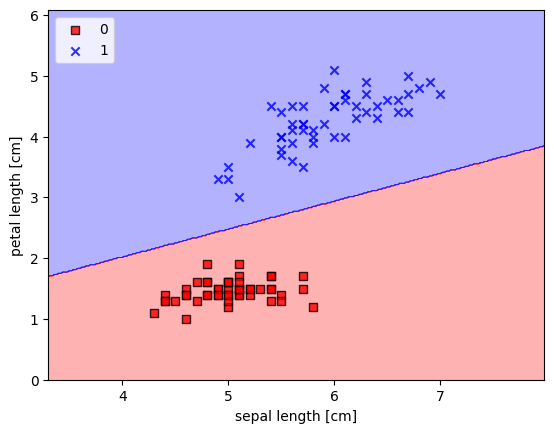

In [91]:
# Selecting X & y values from setosa & versicolor (sepal length vs petal length)
y =  Iris.iloc[0:100, 4].values
X = Iris.iloc[0:100, [0, 2]].values

# Creating Perceptron model
perceptron_model = Perceptron(eta0=0.1, max_iter=10)
perceptron_model.fit(X, y)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X, y, classifier=perceptron_model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

<class 'numpy.ndarray'>


C:\Users\steve\AppData\Local\Temp\ipykernel_15620\2111803465.py:37: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


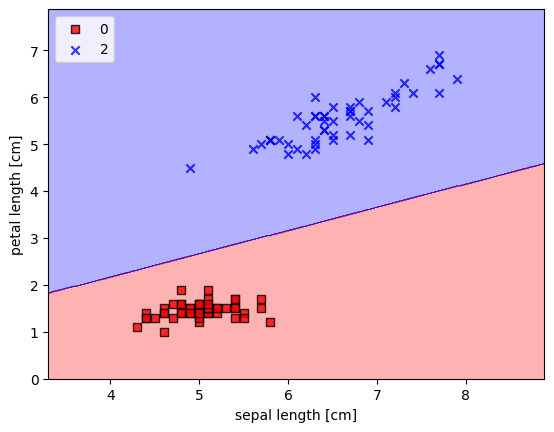

In [95]:
# Selecting X & y values from setosa & versicolor (sepal length vs petal length)
y1 = Iris.iloc[0:50, 4].values
y2 = Iris.iloc[100:150, 4].values
x1 = x = Iris.iloc[0:50, [0, 2]].values
x2 = x = Iris.iloc[100:150, [0, 2]].values
print(type(x1))
y= np.concatenate([y1,y2])
X = np.concatenate([x1,x2])

# Creating Perceptron model
perceptron_model = Perceptron(eta0=0.1, max_iter=10)
perceptron_model.fit(X, y)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X, y, classifier=perceptron_model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


plt.show()